In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [2]:
(trainX, trainY),(testX,testY)=cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
trainX.shape

(50000, 32, 32, 3)

In [4]:
trainY

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
testX.shape

(10000, 32, 32, 3)

In [6]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [7]:
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [8]:
model=Sequential()
model.add(Conv2D(32, (3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3),activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3),activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3),activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu' ))
model.add(Dense(64,activation='relu' ))
model.add(Dense(32,activation='relu' ))
model.add(Dense(10,activation='softmax' ))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 64)          0

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(train_norm,trainY, epochs=500, batch_size=5000, verbose=1)

Epoch 1/500
10/10 [==============================] - 3s 102ms/step - loss: 1.0183 - accuracy: 0.6383
Epoch 2/500
10/10 [==============================] - 1s 103ms/step - loss: 1.0239 - accuracy: 0.6345
Epoch 3/500
10/10 [==============================] - 1s 102ms/step - loss: 1.0264 - accuracy: 0.6341
Epoch 4/500
10/10 [==============================] - 1s 104ms/step - loss: 1.0001 - accuracy: 0.6454
Epoch 5/500
10/10 [==============================] - 1s 102ms/step - loss: 1.0089 - accuracy: 0.6427
Epoch 6/500
10/10 [==============================] - 1s 115ms/step - loss: 1.0107 - accuracy: 0.6402
Epoch 7/500
10/10 [==============================] - 1s 122ms/step - loss: 1.0016 - accuracy: 0.6453
Epoch 8/500
10/10 [==============================] - 1s 103ms/step - loss: 0.9996 - accuracy: 0.6455
Epoch 9/500
10/10 [==============================] - 1s 101ms/step - loss: 1.0000 - accuracy: 0.6458
Epoch 10/500
10/10 [==============================] - 1s 103ms/step - loss: 0.9690 - accura

In [16]:
from tensorflow.keras.models import model_from_json
model_json=model.to_json()

with open("model.json","w") as json_file:
  json_file.write(model_json)


  model.save_weights('model.h5')

In [17]:
json_file = open('model.json','r')
loaded_model_json =json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [18]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 64)          0

In [19]:
loaded_model.load_weights('model.h5')

In [20]:
p = loaded_model.predict(testX)

313/313 [==============================] - 1s 2ms/step


In [21]:
import numpy as np
import pandas as pd

labels_test_predicted = np.argmax(p,1)

labels_test_predicted

array([3, 8, 8, ..., 7, 0, 7])

In [22]:
pd.crosstab(np.argmax(testY,axis=1), labels_test_predicted)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,806,45,13,9,5,2,2,13,41,64
1,47,809,1,1,1,2,1,1,28,109
2,234,41,220,88,15,112,29,166,36,59
3,107,55,12,326,13,188,27,105,52,115
4,144,42,24,97,176,123,18,262,29,85
5,46,32,21,107,4,568,8,123,24,67
6,68,125,18,71,13,75,424,37,46,123
7,66,24,9,13,9,47,0,758,9,65
8,155,45,1,5,0,4,1,10,680,99


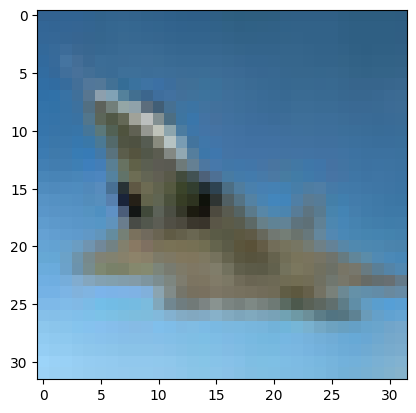

In [23]:
import matplotlib.pyplot as plt

ind=7102
sample_image =testX[ind,:,:,:]

pixels=sample_image.reshape((32,32,3))
plt.imshow(pixels,cmap='gray')
plt.show()

In [24]:
print('real label', np.argmax(testY[ind]))
print('predicted label', np.argmax(labels_test_predicted[ind]))

real label 0
predicted label 0
